# Описание датасета:

Данный датасет содержит информацию о транзакциях по кредитным картам, совершённых в течение двух дней в сентябре 2013 года держателями карт в Европе. Он включает 284 807 транзакций, из которых 492 являются мошенническими (около 0.17%).

Колонки V1–V28 — анонимизированные числовые признаки, полученные с помощью метода главных компонент (PCA), чтобы скрыть исходные данные.

Time — количество секунд, прошедших с момента первой транзакции в выборке.

Amount — сумма транзакции.

Class — целевая переменная:

0 — нормальная (не мошенническая) транзакция

1 — мошенническая транзакция

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Цель анализа

Построить модель для обнаружения мошеннических транзакций по кредитным картам на основе имеющихся признаков.
Особое внимание требуется уделить:
- Обработке несбалансированных классов, так как количество мошеннических транзакций крайне мало.
- Выбору и оценке моделей, способных эффективно выявлять редкие, но критически важные случаи.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"creditcard.csv")

# Первичный анализ данных (EDA)

In [58]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [59]:
df.shape

(284807, 31)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [62]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
df.duplicated().sum()

np.int64(1081)

In [64]:
# Распределение целевой переменной Class
class_counts = df['Class'].value_counts()
print(class_counts)

# Процентное соотношение
print((class_counts / len(df)) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


**Краткий анализ состояния данных**

Размерность: 284 807 строк, 31 признак (включая целевой Class).

Типы данных: все числовые (float64, int64) — отлично для моделей.

Пропуски: нет — ничего не нужно заполнять.

Дубликаты: есть — 1081 дубликат, стоит удалить.

Дисбаланс классов:

Класс 0: 284 315 (~99.83%)

Класс 1 (мошенничество): 492 (~0.17%) → сильный дисбаланс, нужно будет балансировать (undersampling, oversampling, SMOTE).

Признаки V1–V28 уже стандартизированы (по-видимому, результат PCA).

Признаки Time и Amount не масштабированы — возможно, потребуется нормализация или стандартизация.

Распределения — есть подозрение на выбросы (например, по Amount).

In [65]:
# Удалим дубликаты:
df = df.drop_duplicates()

**Исследование выбросов**

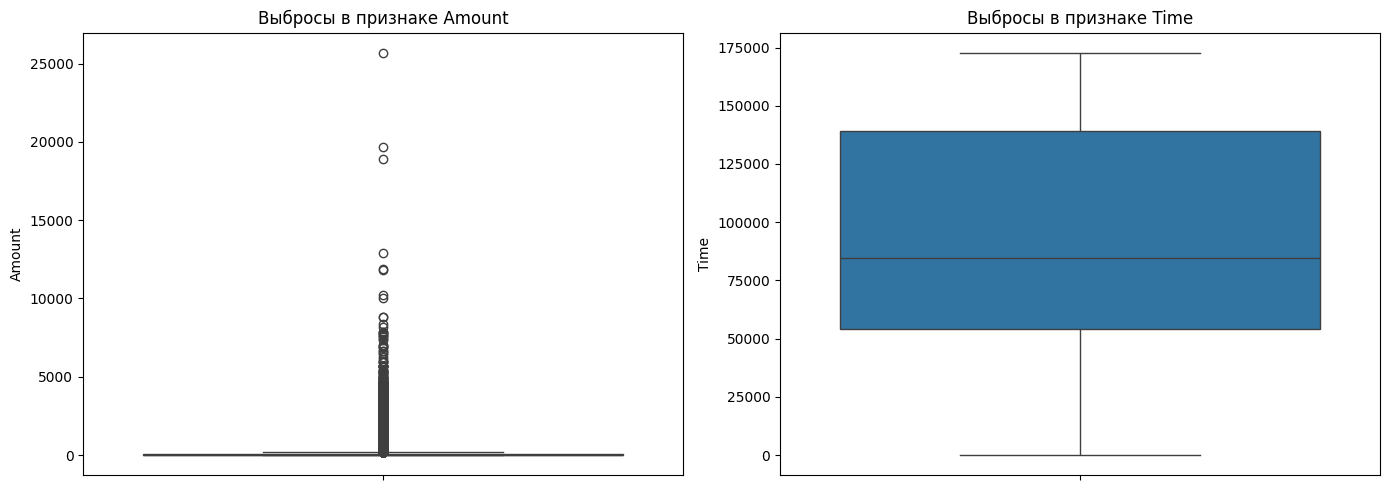

In [66]:
# Визуализация выбросов (по признаку Amount и Time)
# Boxplot для признаков Amount и Time
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, y='Amount', ax=axes[0])
axes[0].set_title('Выбросы в признаке Amount')

sns.boxplot(data=df, y='Time', ax=axes[1])
axes[1].set_title('Выбросы в признаке Time')

plt.tight_layout()
plt.show()

In [67]:
from scipy.stats import zscore

In [68]:
# Выбросы по признакам V1–V28
z_scores = np.abs(zscore(df.drop(columns=["Class"])))
outlier_count = (z_scores > 3).sum(axis=0)

# Посмотрим, в каких признаках больше всего выбросов
outlier_count.sort_values(ascending=False).head(10)

V27       4775
V6        4638
V20       4594
V2        4303
V8        4205
V21       4096
Amount    4063
V1        3647
V10       3450
V12       3446
dtype: int64

Z-оценка (z-score) измеряет, насколько далеко значение отклоняется от среднего в единицах стандартного отклонения. Если |z| > 3, это часто считается выбросом (по правилу трех сигм для нормального распределения).

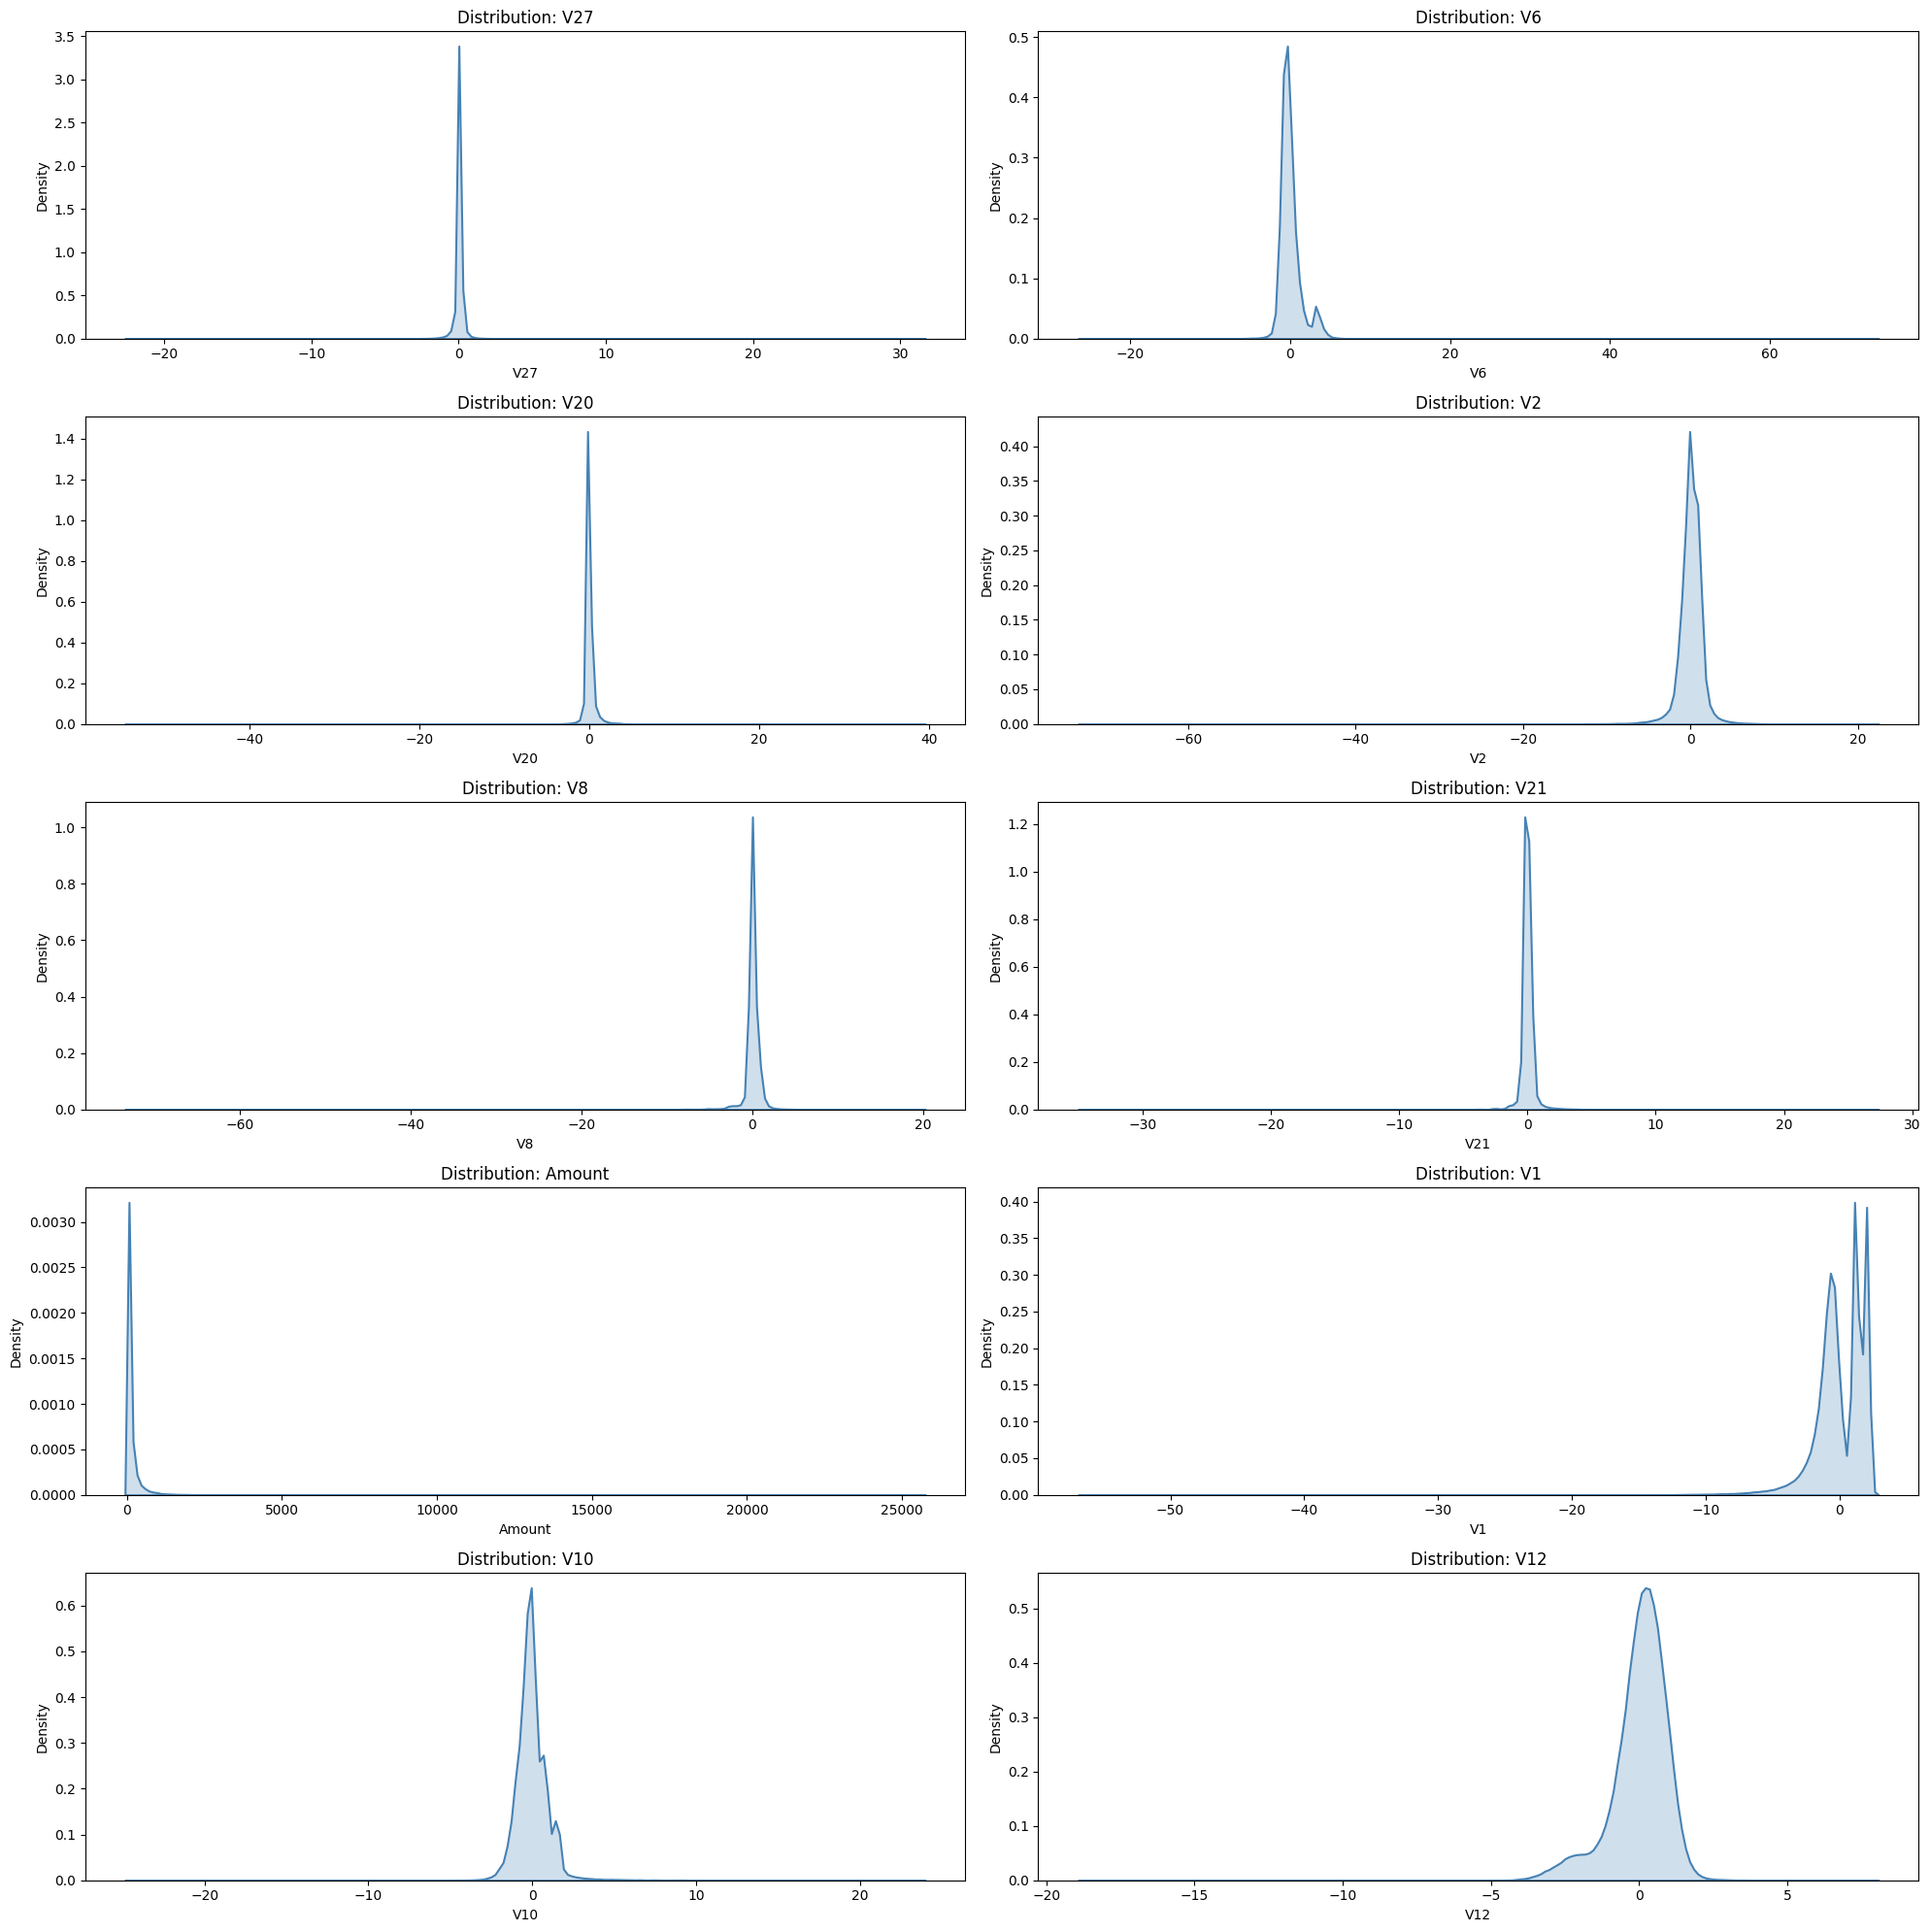

In [69]:
# Выберем признаки с наибольшими выбросами
top_outlier_features = ['V27', 'V6', 'V20', 'V2', 'V8', 'V21', 'Amount', 'V1', 'V10', 'V12']

plt.figure(figsize=(20, 20))
for i, col in enumerate(top_outlier_features):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(df[col], fill=True, color='steelblue', linewidth=1.5)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

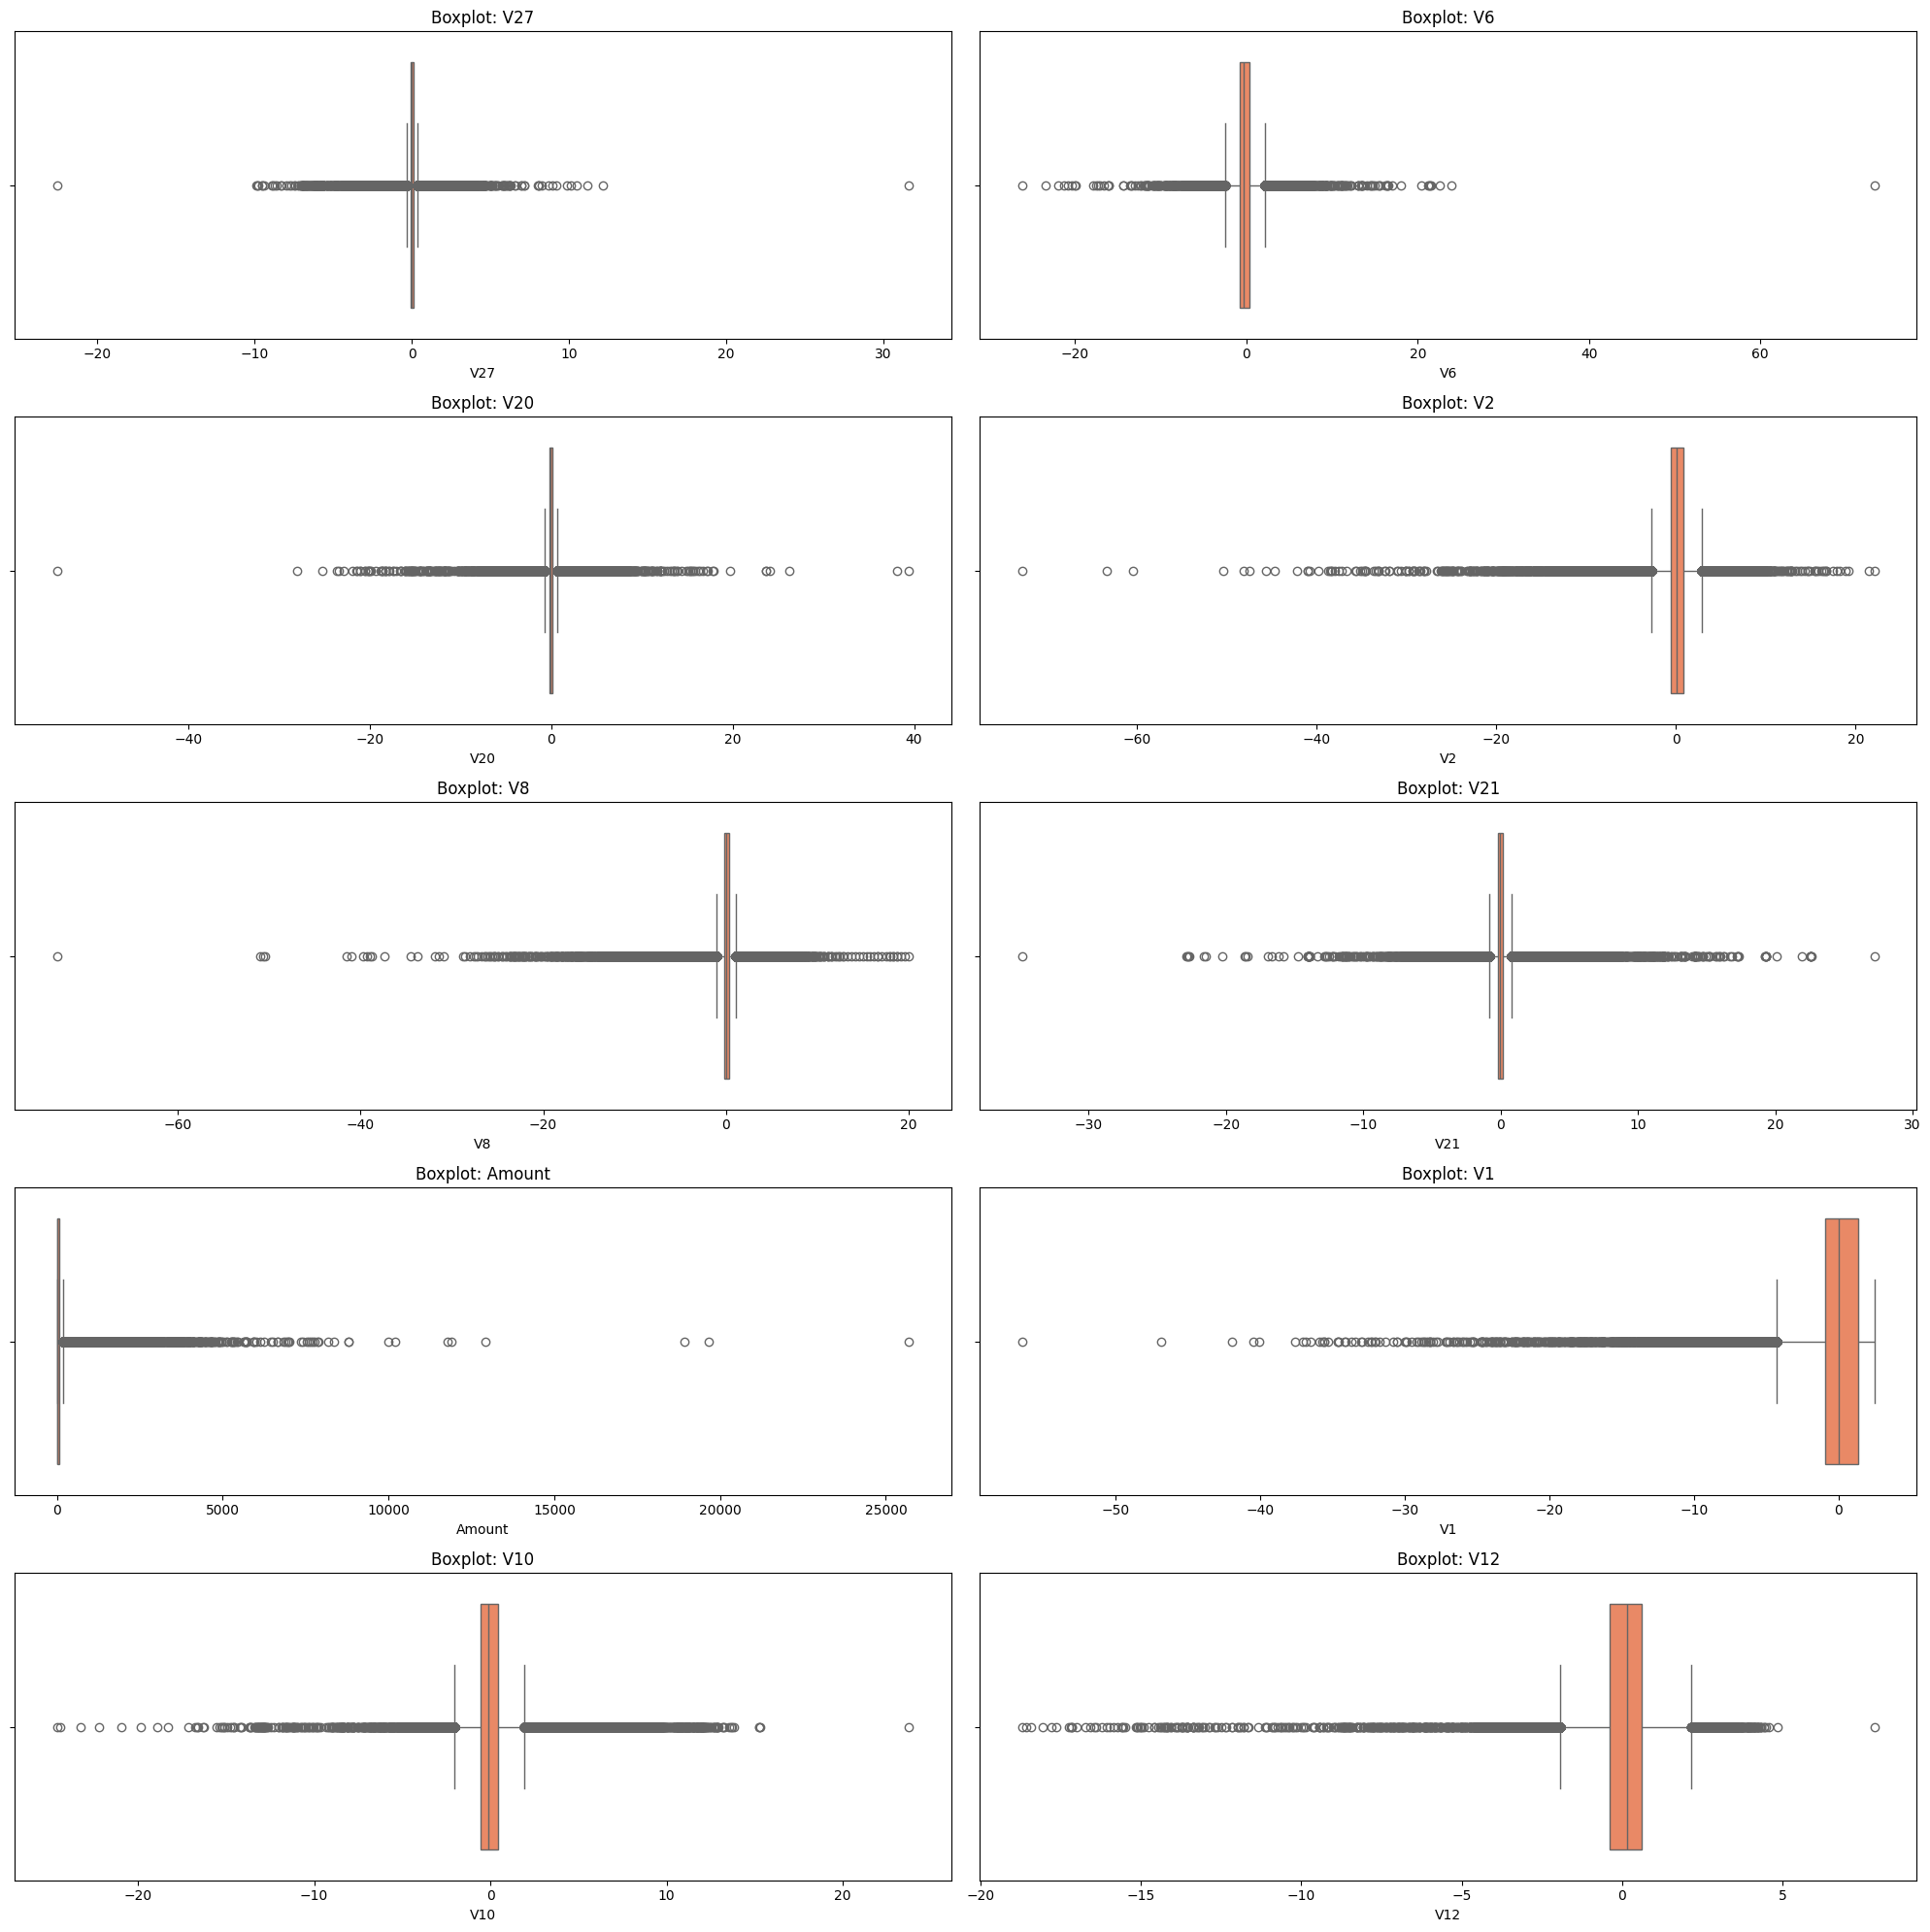

In [70]:
# Посмотрим на выбросы  на графике boxplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(top_outlier_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df[col], color='coral')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

Удалим выбросы

In [71]:
# Считаем Z-оценку по нужным признакам
z_scores = zscore(df[['V27', 'V6', 'Amount']])
mask = (np.abs(z_scores) < 3).all(axis=1)

# Оставим только "нормальные" строки
df_no_outliers = df[mask]

print(f"До удаления: {df.shape[0]} строк")
print(f"После удаления: {df_no_outliers.shape[0]} строк")

До удаления: 283726 строк
После удаления: 271430 строк


Логарифмируем признаки Amount

In [72]:
df['Amount_log'] = np.log1p(df['Amount'])

# Анализ и балансировка классов

In [73]:
df['Class'].value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

Без балансировки модель будет игнорировать мошеннические транзакции.

Даже точность 99.8% ничего не будет значить — потому что модель может просто всегда предсказывать класс 0.

**SMOTE — Synthetic Minority Oversampling Technique**

создаёт синтетические примеры для миноритарного класса путём интерполяции между ближайшими соседями.

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [75]:
# Отделим целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']

In [76]:
# Разделим данные на тренировочные и тестовые 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
# Применим SMOTE только к тренировочной выборке
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [78]:
# Проверим балансировку
print('До SMOTE:', Counter(y_train))
print('После SMOTE:', Counter(y_res))

До SMOTE: Counter({0: 226602, 1: 378})
После SMOTE: Counter({0: 226602, 1: 226602})


До: 378 мошеннических транзакций против 226602 нормальных

После: классы полностью сбалансированы (по 226602 наблюдений каждого класса)

Теперь модель не будет игнорировать класс мошенничества и сможет обучаться на адекватном количестве примеров обоих классов.

# Обучение и оценка моделей

Начнем с базовой модели логистической регрессии, а затем сравнить с другими (например, деревьями решений, случайным лесом или градиентным бустингом).

In [79]:
# Стандартизировать признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [81]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_res_scaled, y_res)

LogisticRegression(max_iter=1000, random_state=42)

In [82]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [83]:
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9998    0.9914    0.9956     56651
           1     0.1424    0.8526    0.2440        95

    accuracy                         0.9912     56746
   macro avg     0.5711    0.9220    0.6198     56746
weighted avg     0.9983    0.9912    0.9943     56746

ROC AUC: 0.9625370110064485
Confusion Matrix:
 [[56163   488]
 [   14    81]]


Класс 0 (немошеннические транзакции):
- precision: 0.9998 — почти нет ложных срабатываний
- recall: 0.9914 — почти все транзакции класса 0 найдены
- f1-score: 0.9956 — идеальный результат

Класс 1 (мошенничество — целевой класс):
- precision: 0.1424 — низкая точность: среди предсказанных как мошенничество много ложных
- recall: 0.8526 — очень высокая полнота: 85% мошенничеств модель находит
- f1-score: 0.2440 — посредственный F1, из-за слабой precision

Общая точность: 99.12%
- Но она неинформативна, так как валидационный набор сильно несбалансирован (95 мошенничеств против 56 тыс. нормальных).

ROC AUC = 0.96
- Это очень хороший результат. AUC учитывает ранжирование вероятностей и независим от порога.

Матрица ошибок:
- 81 из 95 мошенничеств найдены
- 488 ложных срабатываний

Вывод:

Модель хорошо обнаруживает мошенничество (recall), но точность хромает (precision) — много ложных тревог. Это типично при использовании SMOTE, так как он синтетически увеличивает малый класс и модель переобучается на нереалистично чистые примеры мошенничества.

**Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# Обучаем модель на сбалансированных данных после SMOTE
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_res_scaled, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [86]:
# Предсказание на тестовой выборке (не сбалансированной)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_prob_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

In [87]:
# Оценка качества модели
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9497823701723107
Confusion Matrix:
 [[56644     7]
 [   22    73]]


Очень высокая точность (precision) на мошенничестве (0.91).

Очень низкое количество FP (7) и FN (22).

Хороший баланс precision/recall.

# Сравним с другими моделями XGBoost, LightGBM и CatBoost.

**XGBoost**

In [88]:
from xgboost import XGBClassifier

In [89]:
# Модель
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
# Обучение
xgb_model.fit(X_res_scaled, y_res)

In [91]:
# Предсказания
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [92]:
# Метрики
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.64      0.80      0.71        95

    accuracy                           1.00     56746
   macro avg       0.82      0.90      0.85     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9756564895495876
Confusion Matrix:
[[56608    43]
 [   19    76]]


Лучший ROC AUC (0.9757) — модель лучше других различает классы.

Лучший recall среди всех (0.80) — находит больше мошенничеств.

Сниженная точность (precision) — больше FP (43).

**Обучение LightGBM**

In [93]:
from lightgbm import LGBMClassifier

In [94]:
# Модель
lgb_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

In [95]:
# Обучение на SMOTE данных
lgb_model.fit(X_res_scaled, y_res)

[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=6, random_state=42)

In [96]:
# Предсказания
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_proba_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

In [97]:
# Метрики
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.59      0.80      0.68        95

    accuracy                           1.00     56746
   macro avg       0.80      0.90      0.84     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9710452456360227
Confusion Matrix:
[[56599    52]
 [   19    76]]


Такой же recall, как у XGBoost.

Precision хуже (0.59), больше FP (52).

Ниже F1 и AUC, чем у XGBoost.

**Обучение CatBoost**

In [98]:
from catboost import CatBoostClassifier

In [99]:
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    verbose=False,
    random_seed=42
)

In [100]:
cat_model.fit(X_res_scaled, y_res)

In [101]:
# Предсказания
y_pred_cat = cat_model.predict(X_test_scaled)
y_proba_cat = cat_model.predict_proba(X_test_scaled)[:, 1]

In [102]:
# Метрики
print("Classification Report (CatBoost):")
print(classification_report(y_test, y_pred_cat))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_cat))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))

Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.51      0.83      0.63        95

    accuracy                           1.00     56746
   macro avg       0.75      0.92      0.82     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.963932629051933
Confusion Matrix:
[[56575    76]
 [   16    79]]


Самый высокий recall (0.83) — находит больше всего мошенников.

Самый низкий precision (0.51), наибольшее число FP (76).

Ниже F1 и AUC по сравнению с другими моделями.

**Сравнение моделей**

| Модель       | Precision | Recall   | F1-score | ROC AUC    | FP | FN | Примечания                        |
| ------------ | --------- | -------- | -------- | ---------- | -- | -- | --------------------------------- |
| RandomForest | **0.91**  | 0.77     | **0.83** | 0.9498     | 7  | 22 | Самый надёжный precision          |
| XGBoost      | 0.64      | 0.80     | 0.71     | **0.9757** | 43 | 19 | Лучший AUC и хороший recall       |
| LightGBM     | 0.59      | 0.80     | 0.68     | 0.9710     | 52 | 19 | Средние показатели                |
| CatBoost     | 0.51      | **0.83** | 0.63     | 0.9639     | 76 | 16 | Высокий recall, но очень много FP |

Вывод:
- Если приоритет — точность (меньше ложных тревог): ➜ Random Forest
- Если приоритет — recall (поймать больше мошенников): ➜ CatBoost
- Если нужен баланс с высоким AUC: ➜ XGBoost

XGBoost — наиболее сбалансированный вариант.
Он сохраняет высокий recall, не теряя слишком много precision, и показывает лучший ROC AUC, что говорит о высокой способности к различению классов.

# Подбор гиперпараметров для XGBoost (RandomizedSearchCV)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [104]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [105]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [1, 10, 50, 100]  # важно для несбалансированных данных
}

In [106]:
start_time = time.time()
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
xgb_search.fit(X_res_scaled, y_res)

In [108]:
end_time = time.time()

In [109]:
print(f"\n🔍 Подбор параметров завершен за {end_time - start_time:.2f} секунд")
print("🏆 Лучшие параметры:", xgb_search.best_params_)


🔍 Подбор параметров завершен за 348.58 секунд
🏆 Лучшие параметры: {'subsample': 1.0, 'scale_pos_weight': 50, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}


# Построение ROC-кривых и Precision-Recall-кривых для моделей XGBoost, LightGBM и CatBoost на тестовых данных

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [119]:
# Предсказания вероятностей
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
lgb_probs = lgb_model.predict_proba(X_test_scaled)[:, 1]
cat_probs = cat_model.predict_proba(X_test_scaled)[:, 1]

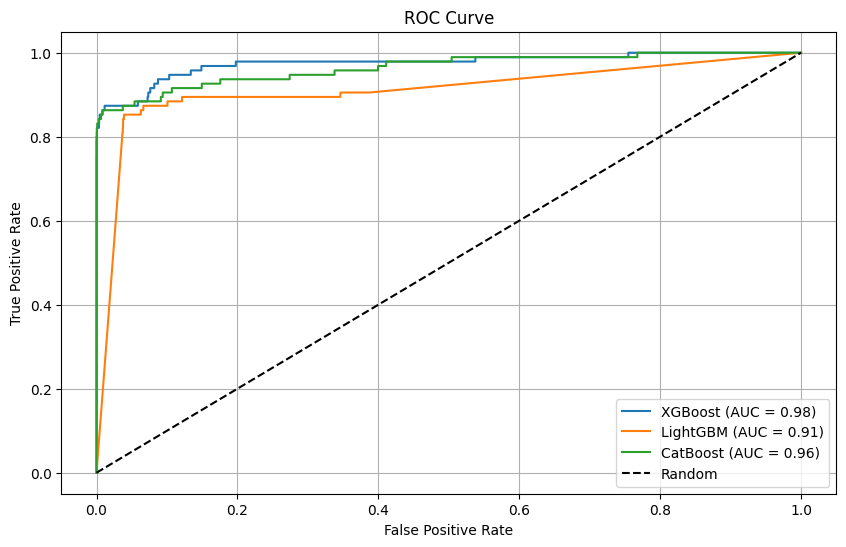

In [122]:
# ROC-кривые
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)
fpr_cat, tpr_cat, _ = roc_curve(y_test, cat_probs)

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
roc_auc_cat = auc(fpr_cat, tpr_cat)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

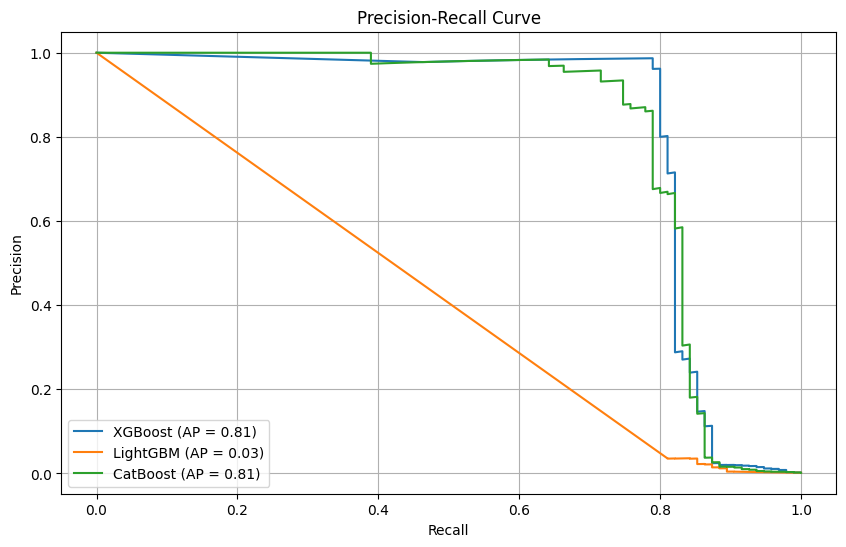

In [123]:
# Precision-Recall кривые
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_probs)
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, lgb_probs)
precision_cat, recall_cat, _ = precision_recall_curve(y_test, cat_probs)

ap_xgb = average_precision_score(y_test, xgb_probs)
ap_lgb = average_precision_score(y_test, lgb_probs)
ap_cat = average_precision_score(y_test, cat_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {ap_xgb:.2f})')
plt.plot(recall_lgb, precision_lgb, label=f'LightGBM (AP = {ap_lgb:.2f})')
plt.plot(recall_cat, precision_cat, label=f'CatBoost (AP = {ap_cat:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Сохранение модели XGB при момощи pipeline

Что нужно сохранить:
| Объект                   | Примечание                                     |
| ------------------------ | ---------------------------------------------- |
| Обученная модель (XGB)   | Основная модель                                |
| StandardScaler           | Для стандартизации новых данных                |
| Колонки признаков        | Чтобы применять трансформации в нужном порядке |
| Pipeline (рекомендуется) | Позволяет сохранить всю цепочку обработки      |


In [130]:
import joblib
from sklearn.pipeline import Pipeline

In [131]:
# Инициализация модели с подобранными гиперпараметрами
xgb_best_model = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=50,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [132]:
# Финальный pipeline с только стандартизацией и моделью
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb_best_model)
])

In [ ]:
# Обучение pipeline на исходных тренировочных данных (без SMOTE)
final_pipeline.fit(X_train, y_train)

In [ ]:
# Сохранение модели в файл
joblib.dump(final_pipeline, 'xgb_final_pipeline.pkl')
print("✅ Модель сохранена как 'xgb_final_pipeline.pkl'")

Что входит в сохранённый файл:
- Стандартизация
- Обученная XGBoost-модель

# Загрузка и использование

In [ ]:
# Загрузка сохраненной модели
loaded_model = joblib.load('xgb_final_pipeline.pkl')

In [ ]:
# Прогноз на новых данных (без целевой переменной)
y_pred = loaded_model.predict(new_data)